# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察均值編碼的效果

# [作業重點]
- 仿造範例, 完成標籤編碼與均值編碼搭配邏輯斯迴歸的預測
- 觀察標籤編碼與均值編碼在特徵數量 / 邏輯斯迴歸分數 / 邏輯斯迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]) 

# 作業1
* 請仿照範例，將鐵達尼範例中的類別型特徵改用均值編碼實作一次

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data_path = ''
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


In [7]:
df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# 作業2
* 觀察鐵達尼生存預測中，均值編碼與標籤編碼兩者比較，哪一個效果比較好? 可能的原因是什麼?

由兩者的score比較可以看的出來是均值編碼會比較好。

原因可以從對兩者不同編碼作圖比較看的出來，均值編碼的類別型欄位與目標值的數據較為集中

In [25]:
# 對照組 : 標籤編碼 + 邏輯斯迴歸
df1 = pd.DataFrame()
for i in df.columns:
    df1[i] = LabelEncoder().fit_transform(df[i])
train_X1 = df1[:train_num]
estimator = LogisticRegression()
start = time.time()
print(f'shape: {train_X1.shape}')
print(f'score: {cross_val_score(estimator,train_X1,train_Y,cv=5).mean()}')
print(f'time: {time.time()-start} sec')

shape: (891, 5)
score: 0.780004837244799
time: 0.024979352951049805 sec


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

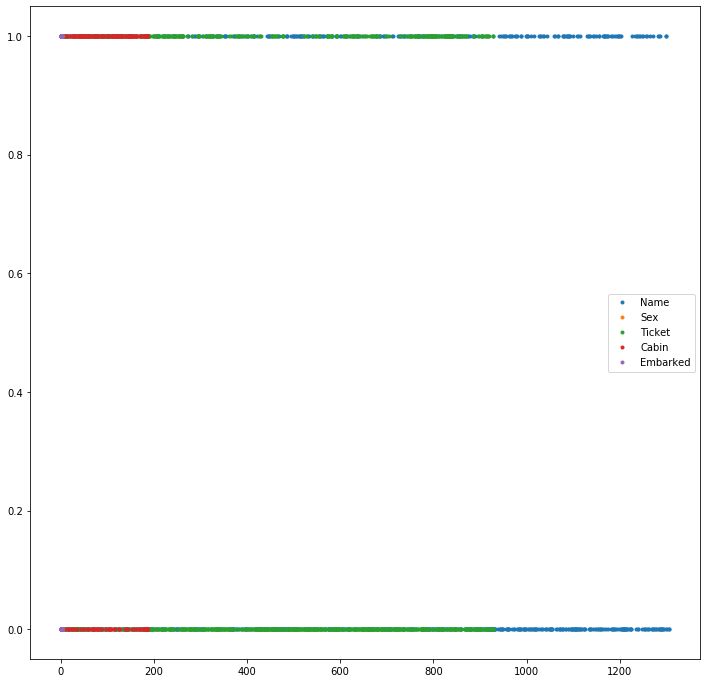

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in train_X1.columns:
    plt.plot(train_X1[i],train_Y,".",label=str(i))
plt.legend()
plt.show()

In [33]:
# 均值編碼 + 邏輯斯迴歸
data = pd.concat([df[:train_num],train_Y], axis=1)
for i in df.columns:
    mean_df = data.groupby(i)["Survived"].mean().reset_index()
    mean_df.columns=[i,f'{i}_mean']
    data=pd.merge(data,mean_df, on=i, how="left")
    data=data.drop([i],axis=1)
data=data.drop(["Survived"], axis=1)
estimator = LogisticRegression()
start=time.time()
print(f'shape: {data.shape}')
print(f'score: {cross_val_score(estimator,data,train_Y,cv=5).mean()}')
print(f'time: {time.time()-start}')

shape: (891, 5)
score: 1.0
time: 0.015924453735351562


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [39]:
data

,Name_mean,Sex_mean,Ticket_mean,Cabin_mean,Embarked_mean
0,0,0.188908,0.00,0.299854,0.336957
1,1,0.742038,1.00,1.000000,0.553571
2,1,0.742038,1.00,0.299854,0.336957
3,1,0.742038,0.50,0.500000,0.336957
4,0,0.188908,0.00,0.299854,0.336957
5,0,0.188908,0.00,0.299854,0.389610
6,0,0.188908,0.00,0.000000,0.336957
7,0,0.188908,0.00,0.299854,0.336957
8,1,0.742038,1.00,0.299854,0.336957
9,1,0.742038,0.50,0.299854,0.553571


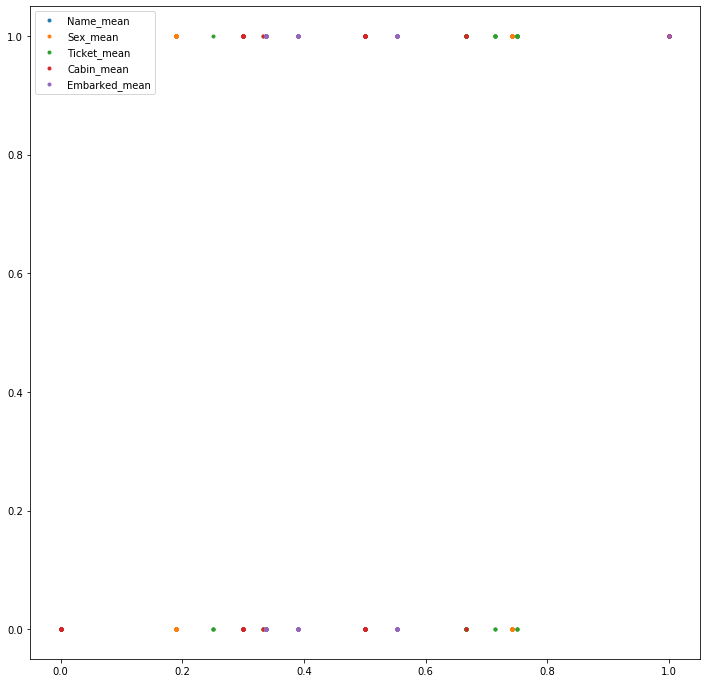

In [40]:
plt.figure(figsize=(12,12))
for i in data.columns:
    plt.plot(data[i],train_Y,".",label=str(i))
plt.legend()
plt.show()